In [37]:
# Calculate the Gini index for a split dataset

def gini_index(groups, classes):
    
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    print(n_instances)
    
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        
        size = float(len(group))
        #print(size)

        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0

        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            #print(p)
            score += p * p

    # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini


In [38]:
# test Gini values
print(gini_index([   [[1, 1], [1, 0]], [[1, 1], [1, 0]]   ],[0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

4.0
0.5
4.0
0.0


In [39]:
#n_instances = float(sum([len(group) for group in groups]))
classes = [0,1]
groups = [   [[1, 1], [1, 0]], [[1, 1], [1, 0]]   ]
gini = 0
n_instances = float(sum([len(group) for group in groups]))
for group in groups:
    print(group)
    size = float(len(group))
    print(size)
    for class_val in classes:
        print(class_val)
        p = [row[-1] for row in group].count(class_val) / size
        score += p * p
        print(p,'---->')
    gini += (1.0 - score) * (size / n_instances)
print(gini,'------------------>')

[[1, 1], [1, 0]]
2.0
0


NameError: name 'score' is not defined

In [52]:
# Import packages
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Import sample data
df = pd.DataFrame(data={'was_on_a_break': [0,1,1,0,0,0],
                        'ever_married': [1,0,1,1,0,0],
                        'had_pet': [0,1,0,0,0,1],
                        'is_parent': [1,1,1,1,0,0]}, 
                  index=['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachael', 'Ross'])

In [55]:
# Define features:X and target:y
X = df.drop(columns='is_parent')
y = df['is_parent']

In [56]:

# Build a decision tree
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
#clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(random_state=0)

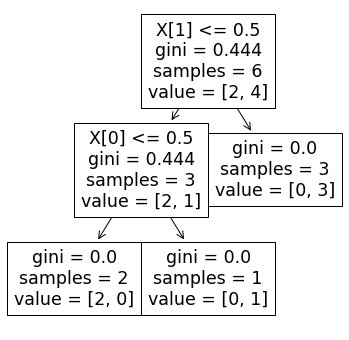

In [57]:
# Visualise the tree (can also visualise a prettier tree using graphviz: https://scikit-learn.org/stable/modules/tree.html)
plt.figure(figsize=(6,6))
plot_tree(clf);

In [44]:
import pandas as pd
classification=['Freshman','Freshman','Sophomore','Junior','Freshman','Sophomore']
hour_of_practice=['>2h','>2h','>2h','<2h','>2h','<2h']
pass_the_quiz=['Yes','Yes','Yes', 'Yes', 'No','No']
df=pd.DataFrame({'Classification':classification, 
                'hour of practice':hour_of_practice, 
                "Pass the quiz":pass_the_quiz })
df

,Classification,hour of practice,Pass the quiz
0,Freshman,>2h,Yes
1,Freshman,>2h,Yes
2,Sophomore,>2h,Yes
3,Junior,<2h,Yes
4,Freshman,>2h,No
5,Sophomore,<2h,No


In [48]:
# Input Format(df, feature name, category name ,target name, list of all classes)
# where df is the current node observation
def gini(df,feature,category,target,classes_list):
    
    df=df[df[feature]==category]
    
    def P_i_K(i):
        return len(df[df[target]==i])/len(df)
        
    result=1-sum([(P_i_K(i))**2 for i in classes_list])
    return result

# Input Format(df, feature name, target name, list of all classes)
def Gini_index(df,feature,target,classes_list):
    
    def P_k_a(category):
        return len(df[df[feature]==category])/len(df)
    
    result=0
    
    for category in df[feature].unique():
        
        gini_value=gini(df,feature,category,target,classes_list) 
        
        P_k_a_value=P_k_a(category)
        
        result+=gini_value*P_k_a_value
    return result

In [49]:
print("Gini Index of Classification",
      Gini_index(df,"Classification","Pass the quiz",['Yes','No']))
print("Gini Index of hour of practice", 
      Gini_index(df,"hour of practice","Pass the quiz",['Yes','No']))

Gini Index of Classification 0.38888888888888884
Gini Index of hour of practice 0.41666666666666663
